In [1]:
import numpy as np
import pandas as pd
import joblib

In [2]:
train_df=pd.read_csv('mnist_train_dataset.csv')
test_df=pd.read_csv('mnist_test_dataset.csv')

In [3]:
train_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
a=train_df.iloc[1,1:]

In [5]:
a

1x1      0
1x2      0
1x3      0
1x4      0
1x5      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 1, Length: 784, dtype: int64

In [6]:
img=np.reshape(a,(28,28))

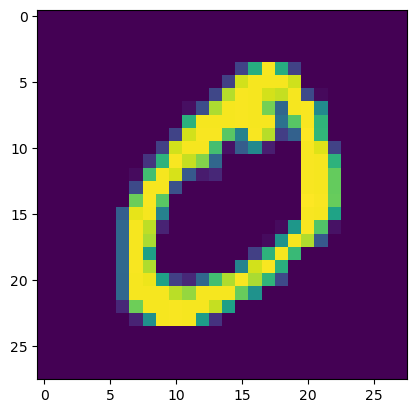

In [7]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.show()

In [8]:
x_tr=train_df.iloc[:,1:].values
y_tr=train_df['label'].values

In [9]:
x_te=test_df.iloc[:,1:].values
y_te=test_df['label'].values

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [11]:
def logistic_regression():
    model_LR=LogisticRegression()
    model_LR.fit(x_tr,y_tr)
    y_pred=model_LR.predict(x_te)
    joblib.dump(model_LR,'models/model_LR.joblib')
    print("Accuracy score of Logistic Regression is",accuracy_score(y_pred,y_te)*100)

In [12]:
logistic_regression()

Accuracy score of Logistic Regression is 92.55


C:\Users\navee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
def knn():
    model_KNN=KNeighborsClassifier(n_neighbors=3)
    params=[{'n_neighbors':list(range(2,8))}]
    model_knn_cv = GridSearchCV(model_KNN,params,cv=5,scoring='accuracy')
    model_knn_cv.fit(x_tr,y_tr)
    y_pred=model_knn_cv.predict(x_te)
    joblib.dump(model_knn_cv,'models/model_knn.joblib')
    print("Accuracy score of K Neigbors classifier is",accuracy_score(y_pred,y_te)*100)

In [16]:
knn()

Accuracy score of K Neigbors classifier is 97.05


In [19]:
def naive_bayes():
    model_NB=GaussianNB()
    model_NB.fit(x_tr,y_tr)
    y_pred=model_NB.predict(x_te)
    joblib.dump(model_NB,'models/model_NB.joblib')
    print("Accuracy of Naive Bayes Classifier is",accuracy_score(y_te,y_pred))

In [20]:
naive_bayes()

Accuracy of Naive Bayes Classifier is 0.5558


In [21]:
def svc():
    model_svm=SVC(kernel='rbf')
    model_svm.fit(x_tr,y_tr)
    y_pred=model_svm.predict(x_te)
    joblib.dump(model_svm,'models/model_svm.joblib')
    print("Accuracy of SVM model is",accuracy_score(y_te,y_pred)*100)

In [22]:
svc()

Accuracy of SVM model is 97.92


In [23]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree():
    model_dt=DecisionTreeClassifier(max_depth=5,criterion='gini')
    params=[{'max_depth':list(range(2,12)),'criterion':['gini','entropy']}]
    model_dt_cv=GridSearchCV(model_dt,params,cv=10,scoring='accuracy')
    model_dt_cv.fit(x_tr,y_tr)
    y_pred=model_dt_cv.predict(x_te)
    joblib.dump(model_dt_cv,'models/model_dt_cv.joblib')
    print("Accuracy of Decision tree model is",accuracy_score(y_te,y_pred)*100)

In [24]:
decision_tree()

Accuracy of Decision tree model is 88.01


In [25]:
from sklearn.ensemble import RandomForestClassifier
def random_forest():
    model_rf=RandomForestClassifier(max_depth=6,n_estimators=10)
    params=[{'max_depth':list(range(2,10)),'n_estimators':[10,20,30,40,50]}]
    model_rf_cv=GridSearchCV(model_rf,params,cv=10,scoring='accuracy')
    model_rf_cv.fit(x_tr,y_tr)
    y_pred=model_rf_cv.predict(x_te)
    joblib.dump(model_rf_cv,'models/model_rf_cv.joblib')
    print("Accuracy of Random Forest is",accuracy_score(y_te,y_pred)*100)

In [26]:
random_forest()

Accuracy of Random Forest is 93.76


In [27]:
import tensorflow as tf

In [32]:
def ann():
    model_ann=tf.keras.models.Sequential()
    model_ann.add(tf.keras.layers.Dense(units=500,activation='relu'))
    model_ann.add(tf.keras.layers.Dense(units=300,activation='relu'))
    model_ann.add(tf.keras.layers.Dense(units=100,activation='relu'))
    model_ann.add(tf.keras.layers.Dense(units=50,activation='relu'))
    model_ann.add(tf.keras.layers.Dense(units=10,activation='softmax'))
    model_ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    y_tr_oh=tf.keras.utils.to_categorical(y_tr,num_classes=10)
    model_ann.fit(x_tr,y_tr_oh,batch_size=200,epochs=100)
    y_pred=model_ann.predict(x_te)
    y_pred=np.argmax(y_pred,axis=1)
    joblib.dump(model_ann,'models/model_ann.joblib')
    print("Accuracy score is",accuracy_score(y_te,y_pred)*100)
#     tensor = tf.convert_to_tensor([input], dtype=tf.float32)
#     print("Predicted label for the input is",np.argmax(model_ann.predict(tensor),axis=1))

In [33]:
ann()

Epoch 1/100
300/300 [==============================] - 5s 12ms/step - loss: 1.7702 - accuracy: 0.8733
Epoch 2/100
300/300 [==============================] - 4s 14ms/step - loss: 0.1879 - accuracy: 0.9523
Epoch 3/100
300/300 [==============================] - 4s 14ms/step - loss: 0.1069 - accuracy: 0.9691
Epoch 4/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0775 - accuracy: 0.9769
Epoch 5/100
300/300 [==============================] - 4s 14ms/step - loss: 0.0614 - accuracy: 0.9819
Epoch 6/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0426 - accuracy: 0.9870
Epoch 7/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0484 - accuracy: 0.9852
Epoch 8/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0553 - accuracy: 0.9837
Epoch 9/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0512 - accuracy: 0.9842
Epoch 10/100
300/300 [==============================] - 4s 12ms/step - loss: 0.039